In [29]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Resize/Crop images

Reading an image in using matplotlib.pyplot.imread. Image data array has shape:

- (M, N) for grayscale images.

- (M, N, 3) for RGB images.

- (M, N, 4) for RGBA images.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

#### Get mean size

In [43]:
def get_average_image_size(img_dir):
  img_sizes = []

  for img_name in os.listdir(img_dir):
      try:
          img = plt.imread(img_dir + img_name)
          img_sizes.append([img.shape[0], img.shape[1]])
      except:
          print(img_name + " corrupt")

  img_sizes = np.array(img_sizes)

  print("Average Image Sizes")
  m_mean = np.mean(img_sizes[:, 0])
  n_mean = np.mean(img_sizes[:, 1])
  print(f"    mean:   ({m_mean}, {n_mean})")

  m_median = np.median(img_sizes[:, 0])
  n_median = np.median(img_sizes[:, 1])
  print(f"    median: ({m_median}, {n_median})")

  return [m_mean, n_mean], [m_median, n_median]

In [118]:
def convert_to_grayscale(img):

    if len(img.shape) == 3:  # RGB image
        grayscale_img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
    elif len(img.shape) == 4:  # RGBA image
        grayscale_img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
    elif len(img.shape) == 1:  # Grayscale image
        grayscale_img = img

    grayscale_img = grayscale_img.astype(np.uint8)

    return grayscale_img

##### Train

In [41]:
train_path = "/content/drive/MyDrive/W281/Final Project/Data/train"

classN_train_path = train_path + "/normal/"
classA_train_path = train_path + "/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/"
classL_train_path = train_path + "/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/"
classS_train_path = train_path + "/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/"

In [53]:
mean_sizes = []

print("CLASS: NORMAL")
mean_sizes.append(get_average_image_size(classN_train_path)[0])

print("\nCLASS: A")
mean_sizes.append(get_average_image_size(classA_train_path)[0])

print("\nCLASS: L")
mean_sizes.append(get_average_image_size(classL_train_path)[0])

print("\nCLASS: S")
mean_sizes.append(get_average_image_size(classS_train_path)[0])


CLASS: NORMAL
n7 - Copy.png corrupt
n7.png corrupt
n7 (2).png corrupt
n7 (2) - Copy.png corrupt
Average Image Sizes
    mean:   (428.72222222222223, 571.4722222222222)
    median: (475.0, 562.0)

CLASS: A
Average Image Sizes
    mean:   (258.26666666666665, 385.574358974359)
    median: (256.0, 388.0)

CLASS: L
Average Image Sizes
    mean:   (259.7391304347826, 398.5304347826087)
    median: (261.0, 406.0)

CLASS: S
Average Image Sizes
    mean:   (271.3806451612903, 396.5032258064516)
    median: (274.0, 404.0)


##### Val

In [54]:
val_path = "/content/drive/MyDrive/W281/Final Project/Data/valid"

classN_valid_path = val_path + "/normal/"
classA_valid_path = val_path + "/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/"
classL_valid_path = val_path + "/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/"
classS_valid_path = val_path + "/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/"

In [55]:
print("CLASS: NORMAL")
mean_sizes.append(get_average_image_size(classN_valid_path)[0])

print("\nCLASS: A")
mean_sizes.append(get_average_image_size(classA_valid_path)[0])

print("\nCLASS: L")
mean_sizes.append(get_average_image_size(classL_valid_path)[0])

print("\nCLASS: S")
mean_sizes.append(get_average_image_size(classS_valid_path)[0])


CLASS: NORMAL
Average Image Sizes
    mean:   (531.3846153846154, 691.6153846153846)
    median: (512.0, 617.0)

CLASS: A
Average Image Sizes
    mean:   (248.08695652173913, 383.4347826086956)
    median: (249.0, 381.0)

CLASS: L
Average Image Sizes
    mean:   (239.38095238095238, 373.9047619047619)
    median: (238.0, 376.0)

CLASS: S
Average Image Sizes
    mean:   (261.46666666666664, 390.46666666666664)
    median: (263.0, 392.0)


##### Test

In [56]:
test_path = "/content/drive/MyDrive/W281/Final Project/Data/test"

classN_test_path = test_path + "/normal/"
classA_test_path = test_path + "/adenocarcinoma/"
classL_test_path = test_path + "/large.cell.carcinoma/"
classS_test_path = test_path + "/squamous.cell.carcinoma/"

In [57]:
print("CLASS: NORMAL")
mean_sizes.append(get_average_image_size(classN_test_path)[0])

print("\nCLASS: A")
mean_sizes.append(get_average_image_size(classA_test_path)[0])

print("\nCLASS: L")
mean_sizes.append(get_average_image_size(classL_test_path)[0])

print("\nCLASS: S")
mean_sizes.append(get_average_image_size(classS_test_path)[0])

CLASS: NORMAL
Average Image Sizes
    mean:   (465.85185185185185, 628.3518518518518)
    median: (481.0, 619.0)

CLASS: A
Average Image Sizes
    mean:   (332.98333333333335, 454.75)
    median: (331.0, 460.0)

CLASS: L
Average Image Sizes
    mean:   (304.8627450980392, 420.8235294117647)
    median: (308.0, 419.0)

CLASS: S
Average Image Sizes
    mean:   (329.1333333333333, 426.0777777777778)
    median: (329.0, 423.5)


In [70]:
mean_sizes = np.array(mean_sizes)
print(f"Mean of all images: ({np.mean(mean_sizes[:, 0]):.2f}, {np.mean(mean_sizes[:, 1]):.2f})")

Mean of all images: (327.60, 460.13)


#### Resize images

In [138]:
from skimage.transform import resize

def resize_images(img_dir, out_img_size, out_img_dir):
  if not os.path.exists(out_img_dir):
    os.makedirs(out_img_dir)
  for img_name in os.listdir(img_dir):
      try:
        img = plt.imread(img_dir + img_name)
        grayscale_img = convert_to_grayscale(img)
        resized_img = resize(grayscale_img, out_img_size, anti_aliasing=True)
        plt.imsave(out_img_dir+"/"+img_name, resized_img, cmap="gray")
      except:
          print(img_name + " corrupt")

In [139]:
output_img_size = (328, 460)
out_img_dir = "/content/drive/MyDrive/W281/Final Project/Data_Resized"

resize_images(classN_train_path, output_img_size, out_img_dir+"/train/normal/")
resize_images(classA_train_path, output_img_size, out_img_dir+"/train/adenocarcinoma/")
resize_images(classL_train_path, output_img_size, out_img_dir+"/train/large.cell.carcinoma/")
resize_images(classS_train_path, output_img_size, out_img_dir+"/train/squamous.cell.carcinoma/")

2.png corrupt
2 - Copy (3).png corrupt
n7 - Copy.png corrupt
n7.png corrupt
n7 (2).png corrupt
n7 (2) - Copy.png corrupt
l5.png corrupt


In [140]:
resize_images(classN_valid_path, output_img_size, out_img_dir+"/valid/normal/")
resize_images(classA_valid_path, output_img_size, out_img_dir+"/valid/adenocarcinoma/")
resize_images(classL_valid_path, output_img_size, out_img_dir+"/valid/large.cell.carcinoma/")
resize_images(classS_valid_path, output_img_size, out_img_dir+"/valid/squamous.cell.carcinoma/")

In [141]:
resize_images(classN_test_path, output_img_size, out_img_dir+"/test/normal/")
resize_images(classA_test_path, output_img_size, out_img_dir+"/test/adenocarcinoma/")
resize_images(classL_test_path, output_img_size, out_img_dir+"/test/large.cell.carcinoma/")
resize_images(classS_test_path, output_img_size, out_img_dir+"/test/squamous.cell.carcinoma/")

##### Visualize resize

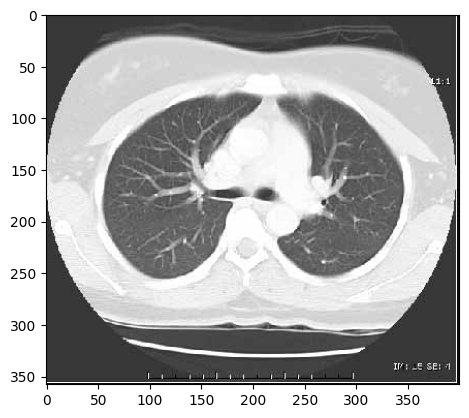

In [142]:
img_name = "/content/drive/MyDrive/W281/Final Project/Data/train/normal/n9.jpg"
img = plt.imread(img_name)
plt.imshow(img)

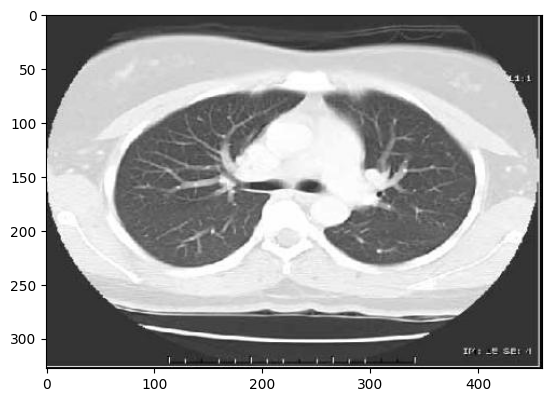

In [143]:
img_name = "/content/drive/MyDrive/W281/Final Project/Data_Resized/train/normal/n9.jpg"
img = plt.imread(img_name)
plt.imshow(img, cmap="gray")

In [144]:
img.shape

(328, 460, 3)

#### Crop images

In [119]:
def crop_images(img_dir, out_img_size, out_img_dir):
  if not os.path.exists(out_img_dir):
    os.makedirs(out_img_dir)
  for img_name in os.listdir(img_dir):
      try:
        img = plt.imread(img_dir + img_name)
        grayscale_img = convert_to_grayscale(img)
        resized_img = resize(grayscale_img, out_img_size, anti_aliasing=True)
        plt.imsave(out_img_dir+"/"+img_name, resized_img)
      except:
          print(img_name + " corrupt")

##### Visualize crop

In [110]:
from PIL import Image

image = Image.open(img_name)

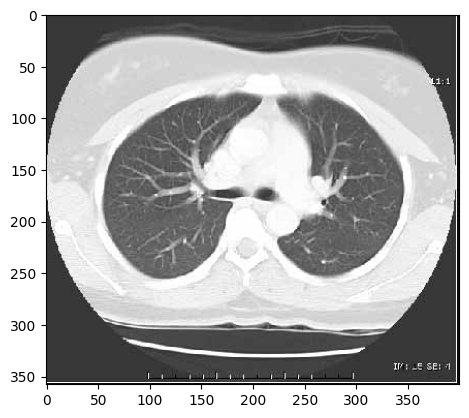

In [103]:
output_img_size = (328, 460)
img_name = "/content/drive/MyDrive/W281/Final Project/Data/train/normal/n9.jpg"
img = plt.imread(img_name)
plt.imshow(img)

In [112]:
center = (img.shape[0] // 2, img.shape[1] // 2)
center_shift = (output_img_size[0]//2, output_img_size[1]//2)

In [114]:
center

(179, 200)

In [115]:
center_shift

(164, 230)

In [117]:
[center[0]-center_shift[0], center[0]+center_shift[0],
                  center[1]-center_shift[1], center[1]+center_shift[1]]

[15, 343, -30, 430]

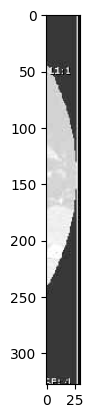

In [113]:
cropped_img = img[center[0]-center_shift[0]:center[0]+center_shift[0],
                  center[1]-center_shift[1]:center[1]+center_shift[1]]
plt.imshow(cropped_img)